그래디언트 부스팅 (Gradient Boosting) : 이진 트리의 오차를 보완하는 방식으로 순차적 학습 - 직열로 연결됨

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [2]:
cancer =  load_breast_cancer()
x_train, x_test, y_train, y_test =train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

In [3]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [4]:
model.score(x_test, y_test)

0.9649122807017544

In [5]:
params ={
    "n_estimators" : range(100, 300, 50),
    "max_depth" : [1, 2, 3, 4, 5],
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1]
}

# n_jobs 사용 불가!! : (순차적이라서) - n_jobs : cup에서 몇개 돌아갈거냐? 병렬작업이였다.
model = GradientBoostingClassifier(random_state=1)

In [6]:
gscv = GridSearchCV(model, params, n_jobs=-1)
gscv.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': range(100, 300, 50)})

In [7]:
print(f"score :  {gscv.score(x_test, y_test)}")
print(f"best params :  {gscv.best_params_}")
print(f"best valid score : {gscv.best_score_}")
print(f"best model : {gscv.best_estimator_}")

score :  0.9473684210526315
best params :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
best valid score : 0.9582417582417582
best model : GradientBoostingClassifier(max_depth=4, random_state=1)


<Axes: >

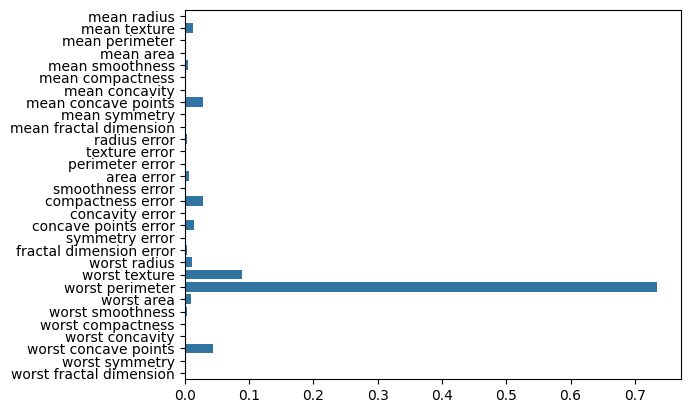

In [8]:
sns.barplot(x=gscv.best_estimator_.feature_importances_, y=cancer.feature_names)

Ada Boost (Adaptive Boosting) : Gradient Boosting과 비슷 (이전 모델이 잘못 분류한 샘플의 가중치를 높혀서 학습)

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
model = AdaBoostClassifier(random_state=1)

In [11]:
model.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [12]:
model.score(x_test, y_test)

0.9736842105263158

<Axes: >

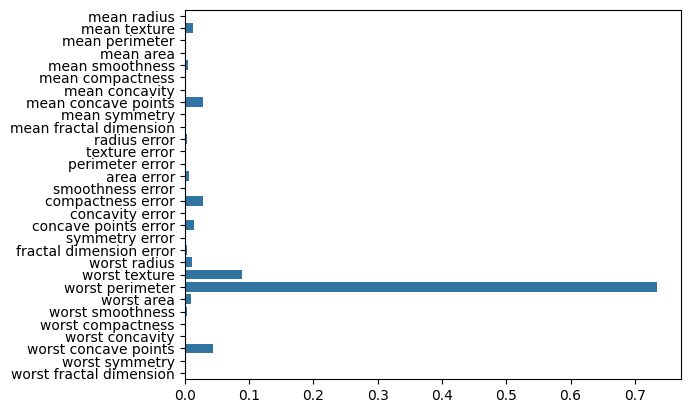

In [13]:
sns.barplot(x=gscv.best_estimator_.feature_importances_, y=cancer.feature_names)